In [19]:
# Import libraries
import sys
import os
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from src.data.loader import DataLoader
from src.utils.helpers import load_config

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## 1️⃣ Load Data

In [20]:
# Load configuration
config = load_config('../config/config.yaml')

# Initialize data loader
loader = DataLoader()

# Load dataset
dataset_path = '../data/raw/cybersecurity_attacks.csv'
df = loader.load_dataset(dataset_path)

print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of samples: {df.shape[0]}")

2025-12-08 13:57:22 - src.data.loader.DataLoader - INFO - Loading dataset from ..\data\raw\cybersecurity_attacks.csv


2025-12-08 13:57:23 - src.data.loader.DataLoader - INFO - Loaded dataset with shape (40000, 25) in 0.26s
2025-12-08 13:57:23 - src.data.loader.DataLoader - INFO - Dataset info: 40000 rows, 25 columns
2025-12-08 13:57:23 - src.data.loader.DataLoader - INFO - Memory usage: 59.76 MB
2025-12-08 13:57:23 - src.data.loader.DataLoader - INFO - Dataset info: 40000 rows, 25 columns
2025-12-08 13:57:23 - src.data.loader.DataLoader - INFO - Memory usage: 59.76 MB


Dataset shape: (40000, 25)
Number of features: 25
Number of samples: 40000


In [21]:
# Display first few rows
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [22]:
# Data types
df.dtypes.value_counts()

object     21
int64       3
float64     1
Name: count, dtype: int64

## 2️⃣ Basic Statistics

In [23]:
# Descriptive statistics
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [24]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

## 3️⃣ Missing Values Analysis

In [25]:
# Calculate missing values
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing %': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(f"Columns with missing values: {len(missing_df)}")
    display(missing_df)
    
    # Visualize
    fig = px.bar(missing_df, x='Column', y='Missing %', 
                 title='Missing Values by Column',
                 labels={'Missing %': 'Missing Percentage'})
    fig.show()
else:
    print("✅ No missing values found!")

Columns with missing values: 5


,Column,Missing Count,Missing %
12,Alerts/Warnings,20067,50.1675
23,IDS/IPS Alerts,20050,50.1250
10,Malware Indicators,20000,50.0000
22,Firewall Logs,19961,49.9025
21,Proxy Information,19851,49.6275


## 4️⃣ Distribution Analysis

Number of numerical features: 4


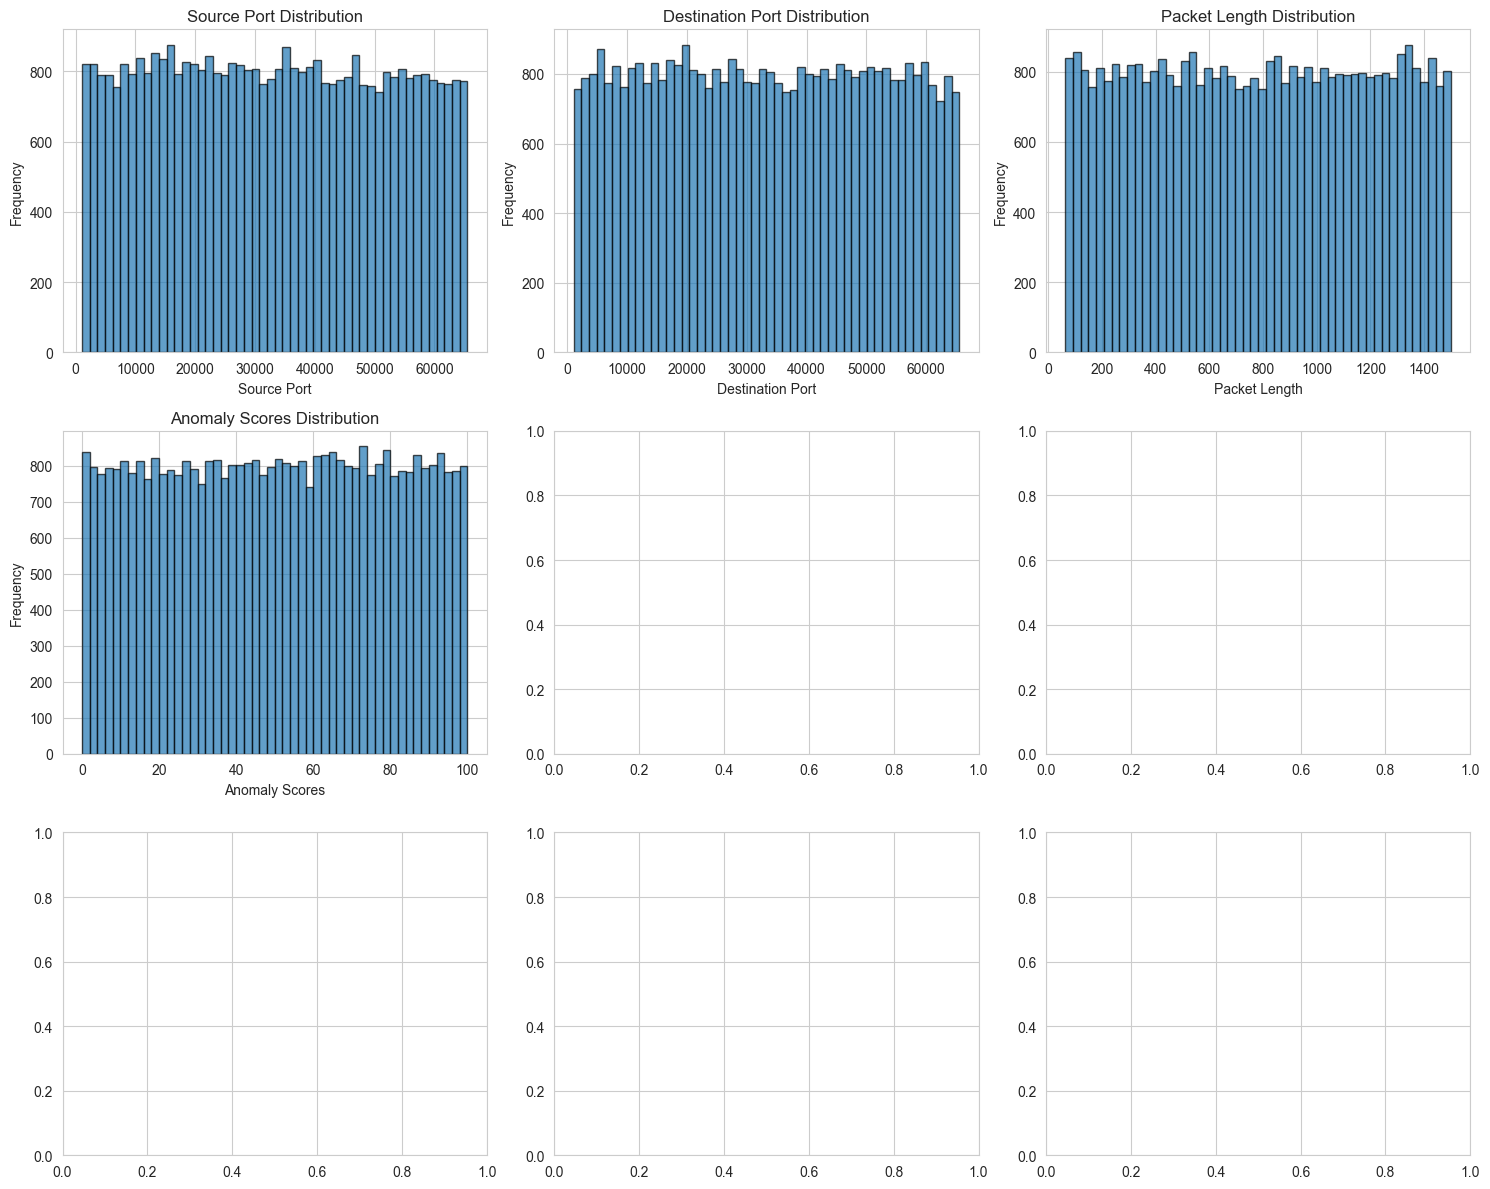

In [26]:
# Numerical features distribution
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Number of numerical features: {len(numerical_cols)}")

# Plot distributions for first 9 numerical features
if len(numerical_cols) > 0:
    n_features = min(9, len(numerical_cols))
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols[:n_features]):
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col} Distribution')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [27]:
# Categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Number of categorical features: {len(categorical_cols)}")

# Display unique values for categorical features
for col in categorical_cols[:5]:  # First 5 categorical columns
    print(f"\n{col}:")
    print(df[col].value_counts())

Number of categorical features: 21

Timestamp:
Timestamp
2022-04-17 20:05:34    2
2022-06-11 14:28:15    2
2022-06-06 12:12:43    2
2022-10-28 13:14:27    1
2022-05-16 17:55:43    1
                      ..
2023-05-26 14:08:42    1
2023-03-27 00:38:27    1
2022-03-31 01:45:49    1
2023-09-22 18:32:38    1
2023-07-16 13:11:07    1
Name: count, Length: 39997, dtype: int64

Source IP Address:
Source IP Address
90.8.96.42        1
150.181.7.82      1
84.23.92.102      1
217.84.23.203     1
200.121.171.60    1
                 ..
163.42.196.10     1
71.166.185.76     1
198.102.5.160     1
97.253.103.59     1
11.48.99.245      1
Name: count, Length: 40000, dtype: int64

Destination IP Address:
Destination IP Address
13.152.188.91      1
49.41.197.165      1
22.146.182.252     1
67.236.206.195     1
42.132.115.167     1
                  ..
101.228.192.255    1
189.243.174.238    1
147.190.155.133    1
77.16.101.53       1
178.157.14.116     1
Name: count, Length: 40000, dtype: int64

Protoco

## 5️⃣ Correlation Analysis

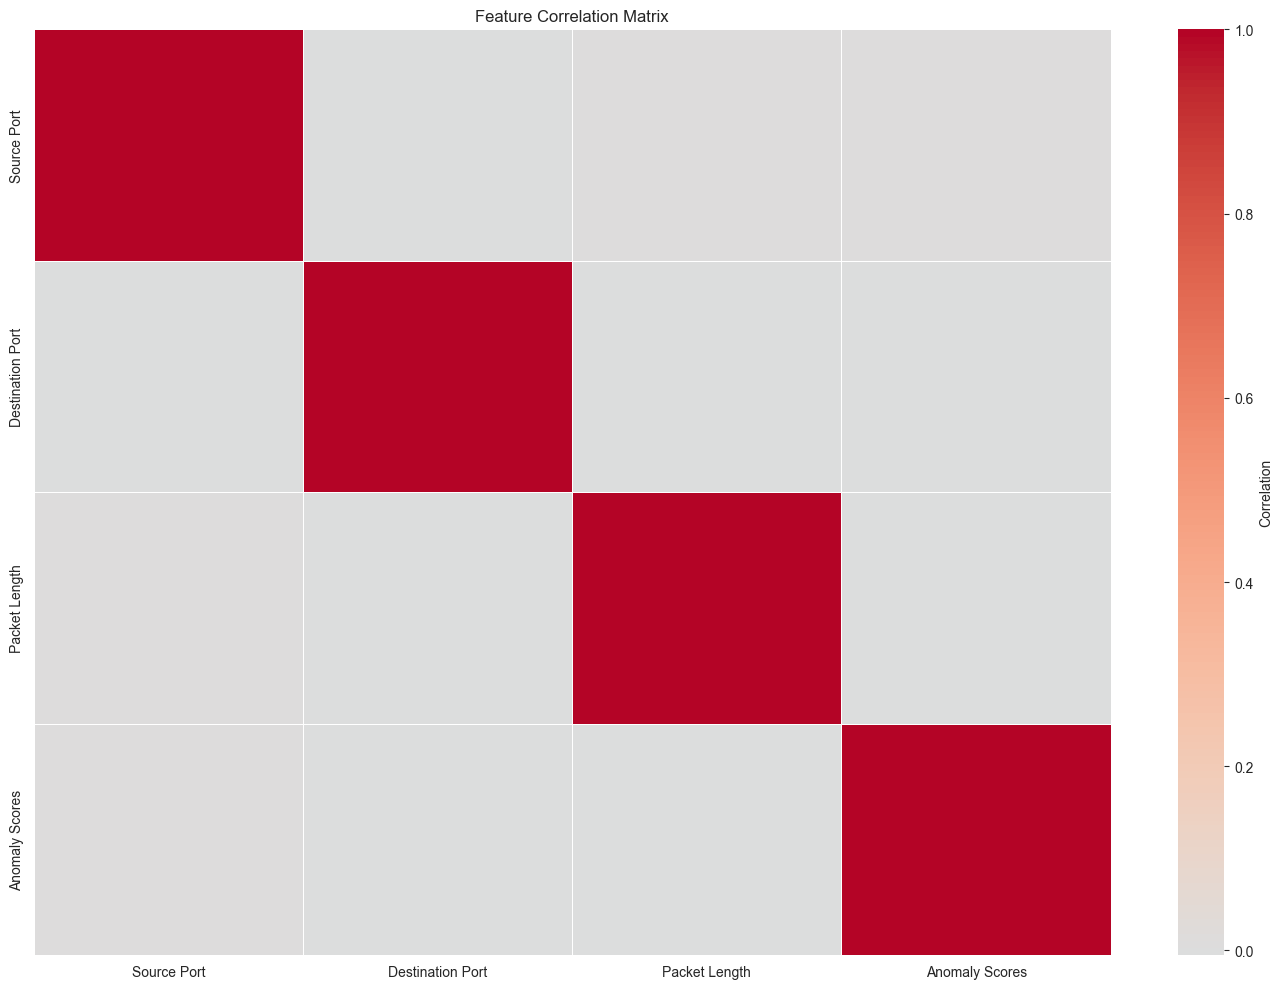

In [28]:
# Calculate correlation matrix
if len(numerical_cols) > 0:
    correlation_matrix = df[numerical_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
                linewidths=0.5, cbar_kws={'label': 'Correlation'})
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated features
    threshold = 0.9
    high_corr = np.where(np.abs(correlation_matrix) > threshold)
    high_corr_list = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                      for x, y in zip(*high_corr) if x != y and x < y]
    
    if high_corr_list:
        print(f"\nHighly correlated features (|r| > {threshold}):")
        for feat1, feat2, corr in sorted(high_corr_list, key=lambda x: abs(x[2]), reverse=True):
            print(f"  {feat1} <-> {feat2}: {corr:.3f}")

## 6️⃣ Feature Importance Preview

Target column: Log Source


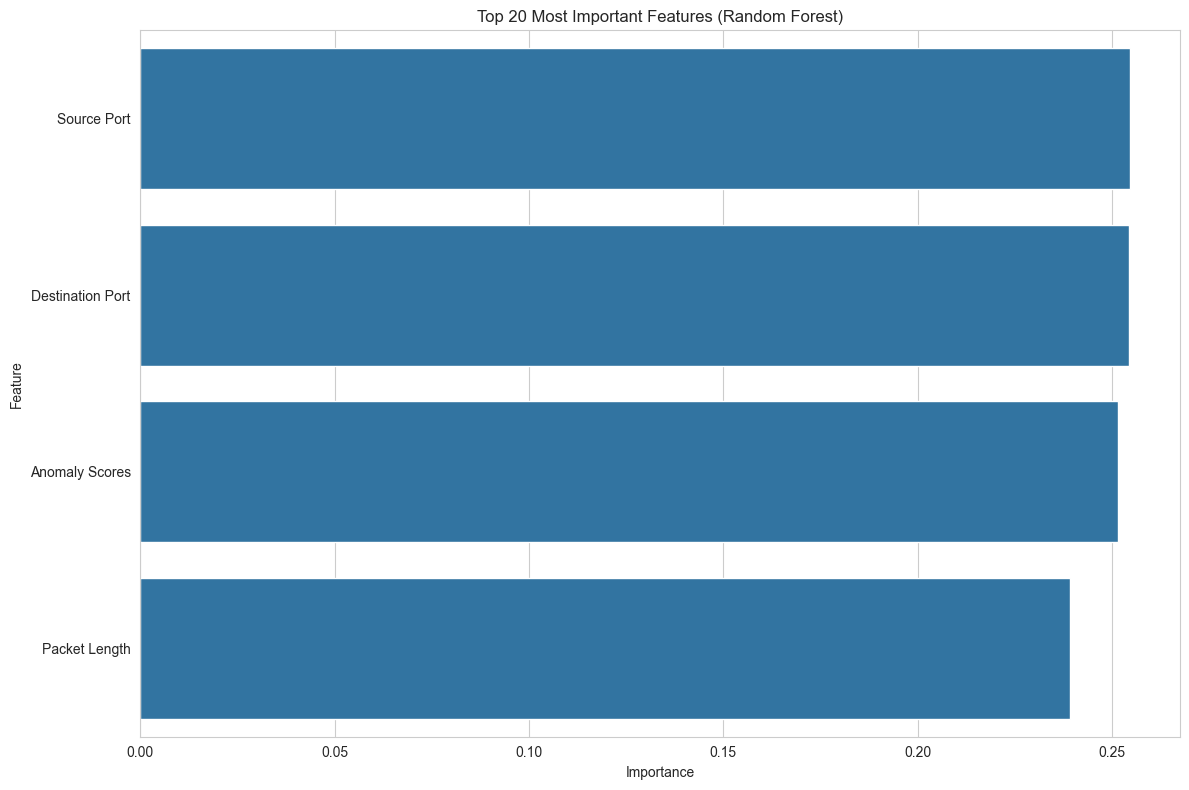

In [29]:
# Quick Random Forest for feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'attack_type' or similar is the target
target_col = 'attack_type' if 'attack_type' in df.columns else df.columns[-1]
print(f"Target column: {target_col}")

# Prepare quick dataset
X_preview = df[numerical_cols].fillna(df[numerical_cols].median())
y_preview = df[target_col]

if y_preview.dtype == 'object':
    le = LabelEncoder()
    y_preview = le.fit_transform(y_preview)

# Train quick RF
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_preview, y_preview)

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X_preview.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## 7️⃣ Class Balance Analysis

In [30]:
# Analyze target variable
target_counts = df[target_col].value_counts()
target_percent = (target_counts / len(df)) * 100

# Create DataFrame
class_dist = pd.DataFrame({
    'Class': target_counts.index,
    'Count': target_counts.values,
    'Percentage': target_percent.values
})

print("Class Distribution:")
display(class_dist)

# Calculate imbalance ratio
majority_class = target_counts.max()
minority_class = target_counts.min()
imbalance_ratio = majority_class / minority_class

print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 10:
    print("⚠️ Severe class imbalance detected! SMOTE/ADASYN recommended.")
elif imbalance_ratio > 3:
    print("⚠️ Moderate class imbalance. Consider balancing techniques.")
else:
    print("✅ Classes are relatively balanced.")

Class Distribution:


,Class,Count,Percentage
0,Firewall,20116,50.29
1,Server,19884,49.71



Imbalance Ratio: 1.01:1
✅ Classes are relatively balanced.


In [31]:
# Visualize class distribution
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Class Distribution (Count)', 'Class Distribution (%)'),
    specs=[[{'type': 'bar'}, {'type': 'pie'}]]
)

# Bar chart
fig.add_trace(
    go.Bar(x=class_dist['Class'].astype(str), y=class_dist['Count'],
           marker_color='lightblue', text=class_dist['Count'],
           textposition='outside'),
    row=1, col=1
)

# Pie chart
fig.add_trace(
    go.Pie(labels=class_dist['Class'].astype(str), values=class_dist['Count'],
           textinfo='label+percent'),
    row=1, col=2
)

fig.update_layout(title_text='Target Variable Distribution', showlegend=False)
fig.show()

## 📝 Summary

### Key Findings:
- Dataset shape and basic statistics reviewed
- Missing values identified (if any)
- Feature distributions analyzed
- Correlations explored
- Important features identified
- Class balance assessed

### Next Steps:
1. Proceed to **02_preprocessing_analysis.ipynb** for detailed preprocessing
2. Apply SMOTE/ADASYN if class imbalance detected
3. Handle outliers using Isolation Forest
4. Feature selection based on importance